In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/03_Mar.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,17.000000,75.000000,1,4,1,1844.0,1891.0,1964.0,1719.0,1540.0,1670.0,1856.416667,1713.0
1,16.916667,74.583333,1,4,1,1787.0,1879.0,1933.0,1679.0,1533.0,1680.0,1834.916667,1675.0
2,16.833333,74.166667,1,4,1,1789.0,1919.0,1950.0,1665.0,1520.0,1664.0,1812.083333,1676.0
3,16.750000,73.750000,1,4,1,1754.0,1885.0,1933.0,1645.0,1500.0,1636.0,1785.333333,1612.0
4,16.666667,73.333333,2,4,1,1713.0,1844.0,1891.0,1614.0,1482.0,1591.0,1763.000000,1623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,20.532452,58.908200,23,1,0,2076.0,2081.0,2215.0,2300.0,2348.0,2270.0,2085.833333,2094.0
8924,20.532452,58.908200,24,1,0,2064.0,1914.0,2200.0,2274.0,2325.0,2273.0,2075.333333,2074.0
8925,20.532452,58.908200,24,1,0,2099.0,1985.0,2186.0,2248.0,2289.0,2244.0,2064.000000,2050.0
8926,20.200000,58.908200,24,1,0,2119.0,2039.0,2173.0,2205.0,2224.0,2192.0,2050.083333,2006.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340


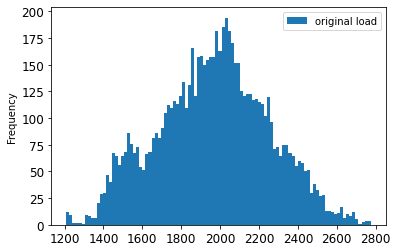

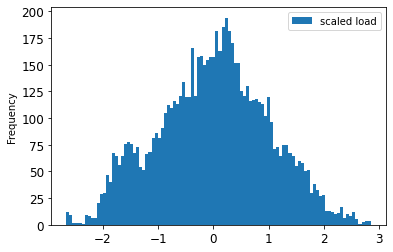

In [8]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

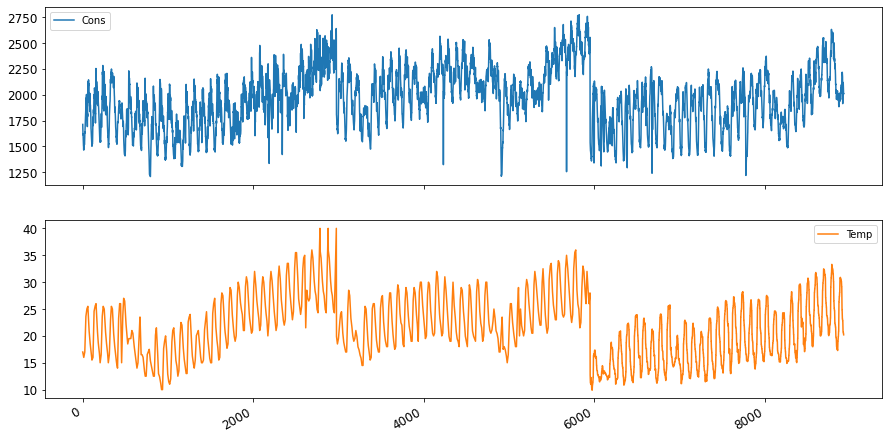

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309,-1.166103
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258,-1.250466
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103,-1.306709
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331,-1.352406
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340,-1.426224
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,-1.788815,-1.380629,-0.829163,-1.482466
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,-1.893629,-1.525661,-0.938407,-1.475436
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,-1.927319,-1.495128,-1.046121,-1.559800
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,-1.975982,-1.498944,-1.149856,-1.630103
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,-2.005929,-1.483678,-1.236456,-1.549254


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309,-1.166103
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258,-1.250466
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103,-1.306709
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331,-1.352406
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340,-1.426224
5,-1.313739,-0.896213,0.811699,-1.516457,-0.072393,0.632605,-1.021206,-0.625825,-0.300570,-1.330746,-1.788815,-1.380629,-0.829163,-1.482466
6,-1.419194,-0.910517,0.787957,-1.516457,-0.072393,0.632605,-1.017685,-0.618774,-0.159403,-1.396084,-1.893629,-1.525661,-0.938407,-1.475436
7,-1.521133,-0.924822,0.764215,-1.516457,-0.072393,0.632605,-1.243044,-0.742155,-0.279395,-1.468682,-1.927319,-1.495128,-1.046121,-1.559800
8,-1.619557,-0.939126,0.740472,-1.372011,-0.072393,0.632605,-1.204310,-0.886687,-0.424091,-1.450532,-1.975982,-1.498944,-1.149856,-1.630103
9,-1.623072,-0.953431,0.716730,-1.372011,-0.072393,0.632605,-1.313468,-1.020644,-0.625254,-1.508611,-2.005929,-1.483678,-1.236456,-1.549254


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7383,-0.709133,-1.107499,1.179844,1.372460,0.938375,0.632605,-0.186674,0.170865,0.338211,-0.659215,-0.695762,-0.640206,-0.121068,NaN
7384,-0.758345,-1.107499,1.179844,1.516906,0.938375,0.632605,-0.316960,0.061584,0.398207,-0.691884,-0.725709,-0.663106,-0.221132,NaN
7385,-0.709133,-1.107499,1.179844,1.516906,0.938375,0.632605,-0.574010,-0.015970,0.352327,-0.695514,-0.669559,-0.575323,-0.312933,NaN
7386,-0.589618,-1.117798,1.186827,1.516906,0.938375,0.632605,-0.750071,-0.104099,0.292331,-0.564838,-0.575976,-0.674555,-0.389128,NaN
7387,-0.649376,-1.128098,1.193809,1.516906,0.938375,0.632605,-0.707817,-0.185178,0.172339,-0.597507,-0.658329,-0.712722,-0.460122,NaN
7388,-0.740770,-1.128098,1.193809,1.661352,0.938375,0.632605,-0.757114,-0.315609,0.062935,-0.749963,-0.766886,-0.808137,-0.529585,NaN
7389,-0.825133,-1.128098,1.193809,1.661352,0.938375,0.632605,-0.707817,-0.572947,-0.014707,-0.862489,-0.879186,-0.922635,-0.599660,NaN
7390,-0.979800,-1.208775,1.193809,1.661352,0.938375,0.632605,-0.588095,-0.749206,-0.102936,-0.993166,-1.055122,-1.052400,-0.675549,NaN
7391,-1.092285,-1.208775,1.226123,1.661352,0.938375,0.632605,-0.647956,-0.706904,-0.184107,-1.120212,-1.174909,-1.185982,-0.754192,NaN
7392,-1.211800,-1.208775,1.226123,-1.660902,1.443758,-1.580765,-0.739508,-0.756256,-0.314687,-1.461422,-1.261006,-1.346280,-0.831917,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7283,-0.280285,-1.001073,1.503704,1.228014,0.432991,0.632605,0.073897,0.400001,0.189985,-0.140140,-0.081856,-0.025731,0.173614,-0.709133
7284,-0.336527,-1.001073,1.503704,1.372460,0.432991,0.632605,0.158407,0.466979,0.253510,-0.463201,-0.231589,-0.243278,0.122818,-0.758345
7285,-0.413861,-1.001073,1.503704,1.372460,0.432991,0.632605,0.059812,0.318922,0.147635,-0.416012,-0.381323,-0.262361,0.074469,-0.709133
7286,-0.695073,-1.134964,1.622771,1.372460,0.432991,0.632605,-0.109207,0.234318,0.285273,-0.557578,-0.575976,-0.373043,-0.010295,-0.589618
7287,-0.691558,-1.268855,1.741838,1.372460,0.432991,0.632605,-0.278226,0.075685,0.401736,-0.728183,-0.692019,-0.518074,-0.104850,-0.649376
7288,-0.723194,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.334566,0.160289,0.468790,-0.757222,-0.714479,-0.697455,-0.207974,-0.740770
7289,-0.726709,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.412033,0.061584,0.320565,-0.702774,-0.628382,-0.674555,-0.298551,-0.825133
7290,-0.600164,-1.337516,1.799235,1.516906,0.432991,0.632605,-0.693732,-0.107624,0.235865,-0.612027,-0.725709,-0.628756,-0.370768,-0.979800
7291,-0.631800,-1.406178,1.856631,1.516906,0.432991,0.632605,-0.690210,-0.276832,0.077052,-0.691884,-0.763142,-0.590590,-0.431969,-1.092285
7292,-0.779436,-1.406178,1.856631,1.661352,0.432991,0.632605,-0.721901,-0.333235,0.161752,-0.797151,-0.856726,-0.735621,-0.513366,-1.211800


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.166103
1,-1.250466
2,-1.306709
3,-1.352406
4,-1.426224
...,...
7288,-0.740770
7289,-0.825133
7290,-0.979800
7291,-1.092285


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.888406,-0.824690,0.930411,-1.660902,-0.072393,0.632605,-0.426118,-0.259207,-0.000590,-0.840710,-1.481862,-0.949352,-0.398309
1,-1.021982,-0.838994,0.906669,-1.660902,-0.072393,0.632605,-0.626828,-0.301509,-0.109995,-0.985906,-1.508065,-0.911186,-0.477258
2,-1.018467,-0.853299,0.882927,-1.660902,-0.072393,0.632605,-0.619786,-0.160502,-0.049999,-1.036724,-1.556729,-0.972251,-0.561103
3,-1.243436,-0.867604,0.859184,-1.660902,-0.072393,0.632605,-0.743029,-0.280358,-0.109995,-1.109322,-1.631595,-1.079117,-0.659331
4,-1.204769,-0.881908,0.835442,-1.516457,-0.072393,0.632605,-0.887399,-0.424890,-0.258220,-1.221849,-1.698975,-1.250864,-0.741340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.723194,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.334566,0.160289,0.468790,-0.757222,-0.714479,-0.697455,-0.207974
7289,-0.726709,-1.268855,1.741838,1.516906,0.432991,0.632605,-0.412033,0.061584,0.320565,-0.702774,-0.628382,-0.674555,-0.298551
7290,-0.600164,-1.337516,1.799235,1.516906,0.432991,0.632605,-0.693732,-0.107624,0.235865,-0.612027,-0.725709,-0.628756,-0.370768
7291,-0.631800,-1.406178,1.856631,1.516906,0.432991,0.632605,-0.690210,-0.276832,0.077052,-0.691884,-0.763142,-0.590590,-0.431969


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1584.0,14.762452,80.189580,1.0,7.0,0.0,1731.0,1764.0,1802.0,1530.0,1551.0,1534.0,1720.166667
7394,1575.0,14.257452,82.334425,1.0,7.0,0.0,1687.0,1798.0,1752.0,1507.0,1542.0,1504.0,1705.416667
7395,1558.0,13.752452,84.479270,1.0,7.0,0.0,1655.0,1781.0,1764.0,1530.0,1520.0,1516.0,1688.250000
7396,1550.0,13.752452,84.479270,2.0,7.0,0.0,1621.0,1755.0,1750.0,1508.0,1503.0,1499.0,1671.583333
7397,1534.0,13.752452,84.479270,2.0,7.0,0.0,1584.0,1731.0,1764.0,1488.0,1483.0,1490.0,1652.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1874.0,18.282452,88.859230,24.0,2.0,1.0,1891.0,2006.0,2119.0,1673.0,1768.0,1946.0,1963.000000
8350,1863.0,18.522451,88.859230,24.0,2.0,1.0,1926.0,1971.0,2092.0,1630.0,1742.0,1912.0,1943.916667
8351,1835.0,18.522451,87.867065,24.0,2.0,1.0,1922.0,1940.0,2070.0,1611.0,1721.0,1869.0,1924.333333
8352,1752.0,18.522451,87.867065,1.0,3.0,1.0,1916.0,1909.0,2039.0,1599.0,1682.0,1815.0,1900.416667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031


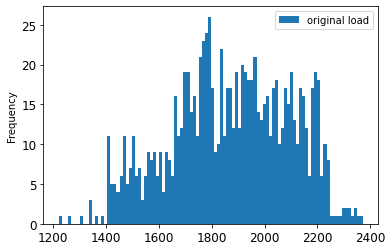

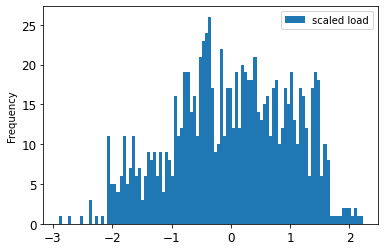

In [19]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697,-1.559907
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332,-1.439686
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212,-1.546549
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766,-1.604433
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953,-1.644507
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365,-1.822612
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797,-1.786991
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903,-1.751370
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253,-1.835970
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031,-1.791444


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697,-1.559907
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332,-1.439686
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212,-1.546549
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766,-1.604433
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953,-1.644507
7398,-1.564360,-1.413556,1.099686,-1.513750,1.441195,-1.22847,-1.319929,-0.819130,-0.322630,-1.663644,-1.734251,-1.599907,-1.127365,-1.822612
7399,-1.559907,-1.424779,1.091935,-1.513750,1.441195,-1.22847,-1.395524,-0.961381,-0.398178,-1.668050,-1.751564,-1.658562,-1.227797,-1.786991
7400,-1.648960,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.431098,-1.112522,-0.513723,-1.831065,-1.829475,-1.692079,-1.325903,-1.751370
7401,-1.666770,-1.424779,1.091935,-1.369419,1.441195,-1.22847,-1.502247,-1.276999,-0.620380,-1.778195,-1.885744,-1.754924,-1.416253,-1.835970
7402,-1.706844,-1.569555,1.118036,-1.369419,1.441195,-1.22847,-1.560054,-1.317007,-0.815918,-1.817847,-1.924699,-1.842906,-1.493031,-1.791444


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8244,-0.580329,-0.659372,0.862968,1.372873,-1.256834,-1.22847,-0.145984,-0.134549,-0.473727,-0.077549,0.758887,0.809137,-0.290172,0.163260
8245,-0.611497,-0.659372,0.862968,1.372873,-1.256834,-1.22847,-0.354982,-0.138994,-0.580384,-0.156854,0.603066,0.675069,-0.292111,0.083113
8246,-0.731718,-0.782824,1.018382,1.372873,-1.256834,-1.22847,-0.381663,-0.054533,-0.367070,-0.227347,0.559782,0.578707,-0.323132,0.238955
8247,-0.820771,-0.906277,1.173796,1.372873,-1.256834,-1.22847,-0.417237,-0.067869,-0.091540,-0.412391,0.317394,0.453018,-0.385951,0.221144
8248,-0.949897,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.577320,-0.143439,-0.131536,-0.430014,0.165901,0.465587,-0.456525,0.194428
8249,-0.905371,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.608447,-0.352370,-0.135980,-0.407985,0.235155,0.507483,-0.522833,0.007418
8250,-0.758434,-0.918622,1.213888,1.517204,-1.256834,-1.22847,-0.728510,-0.379042,-0.051543,-0.302246,0.438588,0.687638,-0.583713,-0.041561
8251,-0.705003,-0.930968,1.253980,1.517204,-1.256834,-1.22847,-0.817445,-0.414605,-0.064876,-0.284622,0.507842,0.582896,-0.638776,-0.166235
8252,-0.789602,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.946401,-0.574637,-0.140424,-0.482884,0.451573,0.570328,-0.694615,-0.535803
8253,-0.887560,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.901934,-0.605754,-0.349294,-0.456449,0.278439,0.390173,-0.740759,-0.638213


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7393,-1.559907
7394,-1.439686
7395,-1.546549
7396,-1.604433
7397,-1.644507
...,...
8249,0.007418
8250,-0.041561
8251,-0.166235
8252,-0.535803


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-1.283844,-1.175629,0.879314,-1.658081,1.441195,-1.22847,-0.626235,-0.476839,-0.304854,-1.505034,-1.431265,-1.432321,-0.704697
7394,-1.323918,-1.288981,0.993375,-1.658081,1.441195,-1.22847,-0.821892,-0.325698,-0.527056,-1.606368,-1.470221,-1.558011,-0.773332
7395,-1.399612,-1.402333,1.107437,-1.658081,1.441195,-1.22847,-0.964188,-0.401269,-0.473727,-1.505034,-1.565445,-1.507735,-0.853212
7396,-1.435233,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.115378,-0.516847,-0.535944,-1.601962,-1.639027,-1.578959,-0.930766
7397,-1.506476,-1.402333,1.107437,-1.513750,1.441195,-1.22847,-1.279908,-0.623535,-0.473727,-1.690079,-1.725594,-1.616666,-1.019953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-0.905371,-0.906277,1.173796,1.517204,-1.256834,-1.22847,-0.608447,-0.352370,-0.135980,-0.407985,0.235155,0.507483,-0.522833
8250,-0.758434,-0.918622,1.213888,1.517204,-1.256834,-1.22847,-0.728510,-0.379042,-0.051543,-0.302246,0.438588,0.687638,-0.583713
8251,-0.705003,-0.930968,1.253980,1.517204,-1.256834,-1.22847,-0.817445,-0.414605,-0.064876,-0.284622,0.507842,0.582896,-0.638776
8252,-0.789602,-0.930968,1.253980,1.661535,-1.256834,-1.22847,-0.946401,-0.574637,-0.140424,-0.482884,0.451573,0.570328,-0.694615


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,103
Trainable params: 2,103
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
30/30 [==============================] - 0s 12ms/step - loss: 1.3216 - val_loss: 1.2941
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 1.3135 - val_loss: 1.2860
Epoch 3/300
30/30 [==============================] - 0s 3ms/step - loss: 1.3056 - val_loss: 1.2780
Epoch 4/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2978 - val_loss: 1.2702
Epoch 5/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2900 - val_loss: 1.2624
Epoch 6/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2824 - val_loss: 1.2547
Epoch 7/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2748 - val_loss: 1.2471
Epoch 8/300
30/30 [==============================] - 0s 3ms/step - loss: 1.2674 - val_loss: 1.2396
Epoch 9/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2600 - val_loss: 1.2323
Epoch 10/300
30/30 [==============================] - 0s 4ms/step - loss: 1.2529 - val_loss: 1.2251
Epoch 11

30/30 [==============================] - 0s 3ms/step - loss: 1.0123 - val_loss: 0.9848
Epoch 84/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0113 - val_loss: 0.9838
Epoch 85/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0103 - val_loss: 0.9828
Epoch 86/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0093 - val_loss: 0.9818
Epoch 87/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0084 - val_loss: 0.9809
Epoch 88/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0074 - val_loss: 0.9800
Epoch 89/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0065 - val_loss: 0.9791
Epoch 90/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0056 - val_loss: 0.9782
Epoch 91/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0047 - val_loss: 0.9773
Epoch 92/300
30/30 [==============================] - 0s 3ms/step - loss: 1.0039 - val_loss: 0.9765
Epoch 93/300


30/30 [==============================] - 0s 3ms/step - loss: 0.9102 - val_loss: 0.9003
Epoch 246/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9094 - val_loss: 0.8997
Epoch 247/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9085 - val_loss: 0.8991
Epoch 248/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9077 - val_loss: 0.8985
Epoch 249/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9068 - val_loss: 0.8979
Epoch 250/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9059 - val_loss: 0.8973
Epoch 251/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9051 - val_loss: 0.8967
Epoch 252/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9042 - val_loss: 0.8961
Epoch 253/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9034 - val_loss: 0.8955
Epoch 254/300
30/30 [==============================] - 0s 3ms/step - loss: 0.9025 - val_loss: 0.8949
Epoc

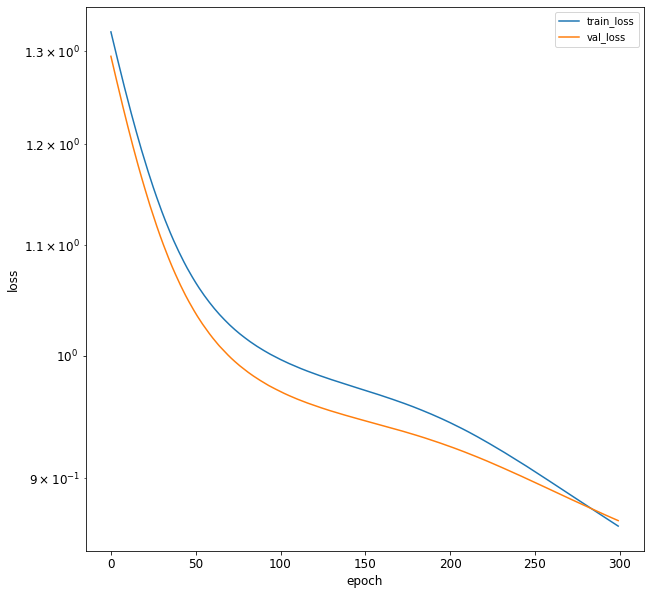

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,1724.0,17.742452,90.436797,1.0,3.0,1.0,1863.0,1926.0,1971.0,1556.0,1635.0,1806.0,1856.750000
8355,1709.0,16.962452,93.006530,1.0,3.0,1.0,1835.0,1922.0,1940.0,1539.0,1622.0,1789.0,1837.500000
8356,1710.0,16.962452,93.006530,2.0,3.0,1.0,1752.0,1916.0,1909.0,1505.0,1625.0,1778.0,1820.916667
8357,1713.0,16.962452,93.006530,2.0,3.0,1.0,1729.0,1874.0,1891.0,1510.0,1602.0,1757.0,1806.083333
8358,1721.0,16.827452,92.880650,2.0,3.0,1.0,1724.0,1863.0,1926.0,1514.0,1623.0,1735.0,1789.000000
8359,1717.0,16.692451,92.754770,2.0,3.0,1.0,1709.0,1835.0,1922.0,1505.0,1600.0,1710.0,1771.916667
8360,1697.0,16.692451,92.754770,3.0,3.0,1.0,1710.0,1752.0,1916.0,1517.0,1587.0,1705.0,1753.666667
8361,1684.0,16.692451,92.754770,3.0,3.0,1.0,1713.0,1729.0,1874.0,1511.0,1571.0,1716.0,1737.833333
8362,1671.0,16.307452,93.064005,3.0,3.0,1.0,1721.0,1724.0,1863.0,1502.0,1557.0,1719.0,1721.833333
8363,1666.0,15.922452,93.373240,3.0,3.0,1.0,1717.0,1709.0,1835.0,1498.0,1567.0,1717.0,1707.750000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


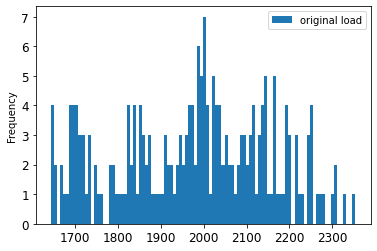

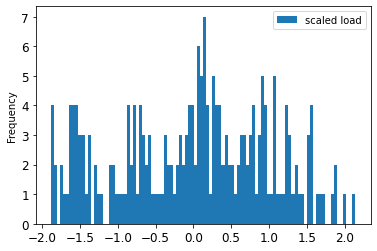

In [33]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,-0.831852,0.308870,-0.720448,-1.202392
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,-0.902613,0.189161,-0.837186,-1.395224
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,-0.886283,0.111703,-0.937752,-1.383881
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,-1.011476,-0.036172,-1.027706,-1.571041
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,-0.897170,-0.191088,-1.131304,-1.554027
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,-1.022362,-0.367129,-1.234902,-1.582384
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,-1.093123,-0.402338,-1.345575,-1.622085
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,-1.180214,-0.324879,-1.441593,-1.639100
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,-1.256418,-0.303754,-1.538622,-1.616413
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,-1.201986,-0.317838,-1.624027,-1.554027


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,-0.831852,0.308870,-0.720448,-1.202392
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,-0.902613,0.189161,-0.837186,-1.395224
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,-0.886283,0.111703,-0.937752,-1.383881
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,-1.011476,-0.036172,-1.027706,-1.571041
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,-0.897170,-0.191088,-1.131304,-1.554027
8359,-1.468954,-1.260391,1.417656,-1.357685,-1.004934,0.0,-1.494417,-0.798578,-0.316356,-1.969130,-1.022362,-0.367129,-1.234902,-1.582384
8360,-1.582384,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.488788,-1.268317,-0.350458,-1.909466,-1.093123,-0.402338,-1.345575,-1.622085
8361,-1.656114,-1.260391,1.417656,-1.217006,-1.004934,0.0,-1.471902,-1.398486,-0.589172,-1.939298,-1.180214,-0.324879,-1.441593,-1.639100
8362,-1.729844,-1.341170,1.432383,-1.217006,-1.004934,0.0,-1.426872,-1.426783,-0.651693,-1.984045,-1.256418,-0.303754,-1.538622,-1.616413
8363,-1.758202,-1.421949,1.447110,-1.217006,-1.004934,0.0,-1.449387,-1.511676,-0.810836,-2.003933,-1.201986,-0.317838,-1.624027,-1.554027


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8461,-1.639100,-0.639335,0.126439,-1.076327,0.516823,0.0,-1.550705,-1.256998,-1.123438,-1.253168,-1.637438,-1.416336,-1.475957,-0.913143
8462,-1.616413,-0.797747,0.307008,-1.076327,0.516823,0.0,-1.533819,-1.200403,-1.021132,-1.278028,-1.572120,-1.345919,-1.530030,-0.691954
8463,-1.554027,-0.956158,0.487577,-1.076327,0.516823,0.0,-1.561962,-1.392826,-1.083652,-1.218364,-1.610222,-1.303669,-1.572986,-0.629567
8464,-1.588056,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.601364,-1.381507,-1.316683,-1.268084,-1.593893,-1.338878,-1.598254,-0.606881
8465,-1.605070,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.618250,-1.568271,-1.271214,-1.253168,-1.550348,-1.416336,-1.629080,-0.368676


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8354,-1.202392
8355,-1.395224
8356,-1.383881
8357,-1.571041
8358,-1.554027
...,...
8461,-0.913143
8462,-0.691954
8463,-0.629567
8464,-0.606881


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,-1.429253,-1.040084,1.307266,-1.498364,-1.004934,0.0,-0.627583,-0.283563,-0.037855,-1.715560,-0.831852,0.308870,-0.720448
8355,-1.514326,-1.203740,1.429646,-1.498364,-1.004934,0.0,-0.785190,-0.306201,-0.214049,-1.800083,-0.902613,0.189161,-0.837186
8356,-1.508654,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.252379,-0.340158,-0.390243,-1.969130,-0.886283,0.111703,-0.937752
8357,-1.491640,-1.203740,1.429646,-1.357685,-1.004934,0.0,-1.381841,-0.577857,-0.492550,-1.944270,-1.011476,-0.036172,-1.027706
8358,-1.446267,-1.232066,1.423651,-1.357685,-1.004934,0.0,-1.409985,-0.640112,-0.293621,-1.924382,-0.897170,-0.191088,-1.131304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.639100,-0.639335,0.126439,-1.076327,0.516823,0.0,-1.550705,-1.256998,-1.123438,-1.253168,-1.637438,-1.416336,-1.475957
8462,-1.616413,-0.797747,0.307008,-1.076327,0.516823,0.0,-1.533819,-1.200403,-1.021132,-1.278028,-1.572120,-1.345919,-1.530030
8463,-1.554027,-0.956158,0.487577,-1.076327,0.516823,0.0,-1.561962,-1.392826,-1.083652,-1.218364,-1.610222,-1.303669,-1.572986
8464,-1.588056,-0.956158,0.487577,-0.935648,0.516823,0.0,-1.601364,-1.381507,-1.316683,-1.268084,-1.593893,-1.338878,-1.598254


In [39]:
predictions = model.predict(X_test)
predictions

array([[0.09133354],
       [0.0839116 ],
       [0.07757932],
       [0.07338265],
       [0.07332963],
       [0.06983528],
       [0.06670609],
       [0.06463808],
       [0.06331301],
       [0.0619294 ],
       [0.0594312 ],
       [0.05846781],
       [0.05870533],
       [0.05882809],
       [0.05798078],
       [0.05772343],
       [0.05801487],
       [0.05870643],
       [0.06090599],
       [0.06366059],
       [0.06691164],
       [0.06947944],
       [0.07201231],
       [0.07517338],
       [0.08009419],
       [0.09190661],
       [0.10080692],
       [0.10455504],
       [0.1114217 ],
       [0.136839  ],
       [0.1524108 ],
       [0.17305595],
       [0.21664146],
       [0.27999404],
       [0.29558873],
       [0.284926  ],
       [0.30915588],
       [0.35187072],
       [0.35045725],
       [0.34902662],
       [0.36329615],
       [0.3802377 ],
       [0.3808814 ],
       [0.37390214],
       [0.387973  ],
       [0.38423043],
       [0.3852152 ],
       [0.364

In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1976.004717
dtype: float64
Cons    176.736516
dtype: float64


In [41]:
load_mean=1976.004717
load_std=176.736516
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


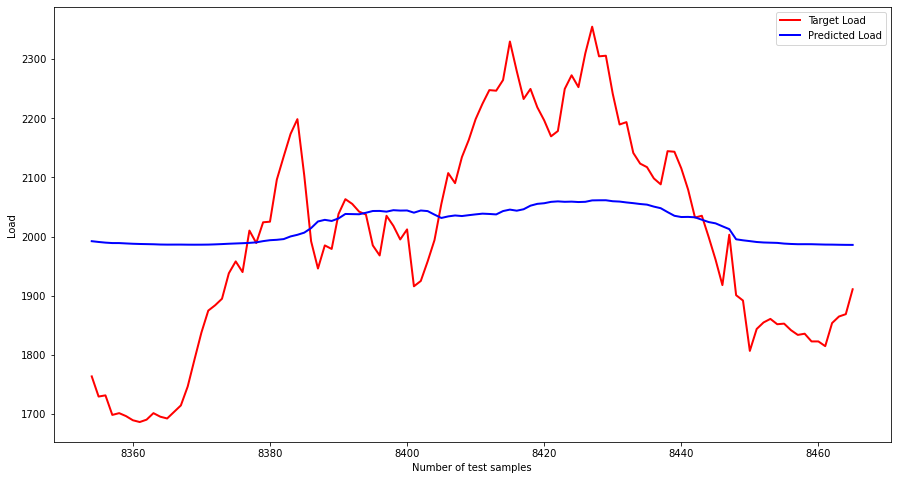

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

6.779898940511127


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -1.646006
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8354  176236.855712
8355  172826.658081
8356  173027.329379
8357  169717.324173
8358  170018.241772
...             ...
8461  181352.425037
8462  185263.968778
8463  186367.217741
8464  186768.401995
8465  190980.687581

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8354  52280.143492
8355  68338.963451
8356  66715.452936
8357  84465.653922
8358  82721.454100
...            ...
8461  29513.737558
8462  17588.308972
8463  14731.781300
8464  13735.163395
8465   5629.915623

[112 rows x 1 columns]
y_t+100    25275.304982
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    158.98209
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1992.1467]
[1990.835]
[1989.7158]
[1988.9741]
[1988.9648]
[1988.3472]
[1987.7942]
[1987.4287]
[1987.1945]
[1986.95]
[1986.5084]
[1986.3381]
[1986.3801]
[1986.4019]
[1986.2521]
[1986.2065]
[1986.258]
[1986.3804]
[1986.769]
[1987.2559]
[1987.8304]
[1988.2843]
[1988.7319]
[1989.2906]
[1990.1603]
[1992.248]
[1993.821]
[1994.4834]
[1995.697]
[2000.1892]
[2002.9413]
[2006.5901]
[2014.2932]
[2025.49]
[2028.2461]
[2026.3616]
[2030.6439]
[2038.1931]
[2037.9434]
[2037.6906]
[2040.2124]
[2043.2067]
[2043.3204]
[2042.0869]
[2044.5737]
[2043.9124]
[2044.0863]
[2040.3695]
[2044.0403]
[2043.0382]
[2037.0609]
[2031.4268]
[2034.063]
[2035.6375]
[2034.6694]
[2036.1353]
[2037.4808]
[2038.711]
[2038.1884]
[2037.4282]
[2043.0842]
[2045.5609]
[2043.7202]
[2046.1594]
[2052.2087]
[2055.2874]
[2056.3308]
[2058.6604]
[2059.4675]
[2058.7405]
[2059.0405]
[2058.3525]
[2058.7366]
[2061.1335]
[2061.3303]
[2061.3726]
[2059.7227]
[2059.1455]
[2057.6775]
[2056.4678]
[2055.0251]
[2053.966]
[2050.6277]
[2047.9362]
[2041